## DATA EDA

Non-occluded 데이터 종류별 분포

### Data loader

In [1]:
import os
from os import listdir
from os.path import isfile, join

import matplotlib.pyplot as plt
import numpy as np

In [2]:
data_dir = "./data/new_train_3"

included_extensions = ['jpg','jpeg', 'bmp', 'png', 'gif']

file_names = [fn for fn in os.listdir(data_dir)
              if any(fn.lower().endswith(ext) for ext in included_extensions)]

num_file_names = len(file_names)

print("number of files: ", num_file_names)

number of files:  15301


---
### Total of Occluded and Non-occluded

{'Non_occluded': 6668, 'Occluded': 8633}


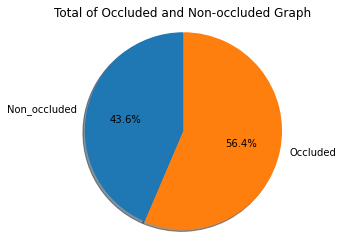

In [7]:
# a_b_cxxxxx.extension
abc_dict = {0:"a", 2:"b", 4:"c"}

# 0: Non-occluded, 1: Occluded
data_dict3 = {"Non_occluded":0, "Occluded":0}
for i, file_name in enumerate(file_names):
    
    abc_sum = 0
    for j in abc_dict.keys():
        if abc_sum>0:
            break
            
        fnj = file_name[j] 
        if fnj.isdigit():
            if int(fnj)>0:
                abc_sum+=1
                
    if abc_sum>0:
        data_dict3["Occluded"]+=1
    elif abc_sum==0:
        data_dict3["Non_occluded"]+=1
            

print(data_dict3)
#print("number of files: {}, data sum values: {}".format(num_file_names, sum(data_dict3.values())))

labels = list(data_dict3.keys())
sizes = list(data_dict3.values())
explode = (0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Total of Occluded and Non-occluded Graph')
plt.savefig("plot_images/Total_of_Occluded_and_Non-occluded_Graph.png")
plt.show()

---
### Part of  Occluded and Non-occluded

{'a0': 6670, 'a1': 8631, 'b0': 13577, 'b1': 1724, 'c0': 8251, 'c1': 7050}


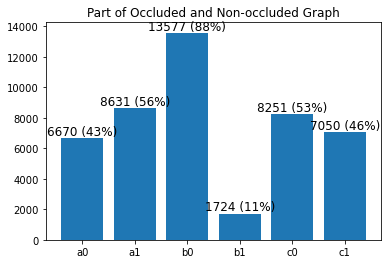

0: Non-occluded, 1: Occluded
a: whole face 
b: upper face 
c: lower face


In [8]:
# a_b_cxxxxx.extension
abc_dict = {0:"a", 2:"b", 4:"c"}

# 0: Non-occluded, 1: Occluded
# data_dict = {"a0":0, "a1":0, "b0":0, "b1":0, "c0":0, "c1":0}
# d,e,f..가 추가 되어도 편하게 관리하기 위해서 for문으로 구성
data_dict = {}
for key in abc_dict.keys():
    for i in [0,1]:
        data_dict[abc_dict[key]+str(i)]=0

for i, file_name in enumerate(file_names):
    for j in abc_dict.keys():
        fnj = file_name[j] 
        if fnj.isdigit():
            fn_idx = abc_dict[j] + str(fnj)
            data_dict[fn_idx]+=1

print(data_dict)
#print("number of files: {}, sum a: {}".format(num_file_names, data_dict["a0"]+data_dict["a1"]))

keyname1 = list(data_dict.keys())
values1 = data_dict.values()
x1 = np.arange(len(keyname1))

bar = plt.bar(x1, values1)
for rect in bar:
    height = rect.get_height()
    
    b_txt= "{} ({}%)".format(height, int((height/15301)*100))
    plt.text(rect.get_x() + rect.get_width()/2.0, height, b_txt, ha='center', va='bottom', size = 12)
    
plt.xticks(x1, keyname1)
plt.title('Part of Occluded and Non-occluded Graph')
plt.savefig("plot_images/Part_of_Occluded_and_Non-occluded Graph.png")
plt.show()

print("0: Non-occluded, 1: Occluded")
print("a: whole face \nb: upper face \nc: lower face")

---
### Focus on the Occluded part

{'a0': 6670, 'b1': 1582, 'c1': 6908, 'bc1': 141}


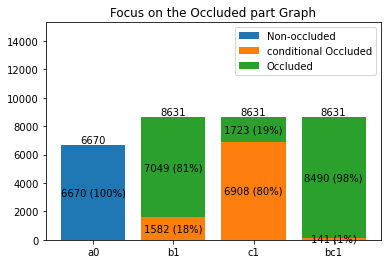

0: Non-occluded, 1: Occluded
a: whole face 
b: upper face 
c: lower face


In [9]:
# a_b_cxxxxx.extension
abc_dict = {0:"a", 2:"b", 4:"c"}

# 0: Non-occluded, 1: Occluded
data_dict2 = {"a0":0, "b1":0, "c1":0, "bc1":0}

for i, file_name in enumerate(file_names):
    
    b_sum = 0
    c_sum = 0
    
    for j in abc_dict.keys():
        fnj = file_name[j] 
        if fnj.isdigit()==False:
            break

        if abc_dict[j]=="a":
            if int(fnj)==0:
                break
                
        elif abc_dict[j]=="b":
            if int(fnj)==1:
                b_sum+=1
                
        elif abc_dict[j]=="c":
            if int(fnj)==1:
                c_sum+=1
             
    if b_sum>0 and c_sum==0:
        data_dict2["b1"]+=1
    elif b_sum==0 and c_sum>0:
        data_dict2["c1"]+=1
    elif b_sum>0 and c_sum>0:
        data_dict2["bc1"]+=1
    else:
        data_dict2["a0"]+=1
            
print(data_dict2)
# print("number of files: {}, data sum values: {}".format(num_file_names, sum(data_dict2.values())))

num_a0 = sum(v for k, v in data_dict2.items() if k =="a0")
num_a1 = sum(data_dict2.values()) - num_a0

x = list(data_dict2.keys())

y1 = np.array([num_a0, 0, 0, 0])  # Non-occluded
y2 = np.array([0, data_dict2["b1"], data_dict2["c1"], data_dict2["bc1"]])  # Occluded

y3  = np.array([0, num_a1-data_dict2["b1"], num_a1-data_dict2["c1"], num_a1-data_dict2["bc1"]])  # Occluded

# memo of sample number
snum = y1+y2+y3

# stack bars
plt.bar(x, y1, label='Non-occluded')
plt.bar(x, y2 ,label='conditional Occluded')
plt.bar(x, y3 ,bottom=y2,label='Occluded')

# add text annotation corresponding to the percentage of each data.
for xpos, ypos, yval in zip(x[:1], y1[:1]/2, y1[:1]):
    y_txt = "{} ({}%)".format(yval, int(yval/num_a0)*100)#"%d"%yval
    plt.text(xpos, ypos, y_txt, ha="center", va="center")
    
for xpos, ypos, yval in zip(x[1:], y1[1:]+y2[1:]/2, y2[1:]):
    y_txt = "{} ({}%)".format(yval, int((yval/num_a1)*100))#"%d"%yval#"%d"%yval #"%d"%yval
    plt.text(xpos, ypos, y_txt, ha="center", va="center")
    
for xpos, ypos, yval in zip(x[1:], y1[1:]+y2[1:]+y3[1:]/2, y3[1:]):
    y_txt = "{} ({}%)".format(yval, int((yval/num_a1)*100))#"%d"%yval#"%d"%yval #"%d"%yval
    plt.text(xpos, ypos, y_txt, ha="center", va="center")
    
# add text annotation corresponding to the "total" value of each bar
for xpos, ypos, yval in zip(x, y1+y2+y3, snum):
    plt.text(xpos, ypos, "%d"%yval, ha="center", va="bottom")

plt.ylim(0,num_file_names)

plt.title('Focus on the Occluded part Graph')
plt.legend()
plt.savefig("plot_images/Focus_on_the Occluded_part_Graph.png")
plt.show()
# plt.savefig('stacked_barplot_with_number.png', bbox_inches='tight', pad_inches=0.02)

print("0: Non-occluded, 1: Occluded")
print("a: whole face \nb: upper face \nc: lower face")

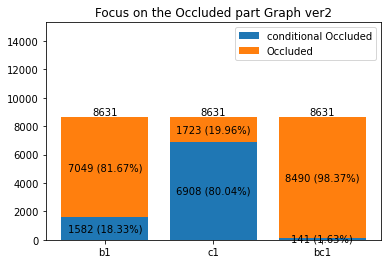

0: Non-occluded, 1: Occluded
a: whole face 
b: upper face 
c: lower face


In [10]:
num_a0 = sum(v for k, v in data_dict2.items() if k =="a0")
num_a1 = sum(data_dict2.values()) - num_a0

x = ["b1","c1","bc1"]

y2 = np.array([data_dict2["b1"], data_dict2["c1"], data_dict2["bc1"]])  # Occluded

y3  = np.array([num_a1-data_dict2["b1"], num_a1-data_dict2["c1"], num_a1-data_dict2["bc1"]])  # Occluded

# memo of sample number
snum = y2+y3

# stack bars
plt.bar(x, y2 ,label='conditional Occluded')
plt.bar(x, y3 ,bottom=y2,label='Occluded')

    
for xpos, ypos, yval in zip(x[:], y2[:]/2, y2[:]):
    y_txt = "{} ({}%)".format(yval, round((yval/num_a1)*100,2))#"%d"%yval#"%d"%yval #"%d"%yval
    plt.text(xpos, ypos, y_txt, ha="center", va="center")
    
for xpos, ypos, yval in zip(x[:], y2[:]+y3[:]/2, y3[:]):
    y_txt = "{} ({}%)".format(yval, round((yval/num_a1)*100,2))#"%d"%yval#"%d"%yval #"%d"%yval
    plt.text(xpos, ypos, y_txt, ha="center", va="center")
    
# add text annotation corresponding to the "total" value of each bar
for xpos, ypos, yval in zip(x, y2+y3, snum):
    plt.text(xpos, ypos, "%d"%yval, ha="center", va="bottom")

plt.ylim(0,num_file_names)

plt.title('Focus on the Occluded part Graph ver2')
plt.legend()
plt.savefig("plot_images/Focus_on_the Occluded_part_Graph_2.png")
plt.show()

print("0: Non-occluded, 1: Occluded")
print("a: whole face \nb: upper face \nc: lower face")